In [1]:
import os
import yaml
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

os.chdir("../scripts")

import preprocess, train, inference, interpret

In [2]:
with open("../model/params.yaml", "r") as params_file:
    params = yaml.safe_load(params_file)

data_dir = params['data_dir']

In [3]:
file_name = "Trepn_2022.04.04_183605_total.csv"
data = preprocess.load_data(file_name)
data.head(3)

,TimeMS,Time,Min,Memory Usage,CPU Frequency,CPU Load,Wi-Fi RSSI Level,Screen Bright,Battery,Download,Upload,Quality
0,27,0,00:00:00,1824244,1144000,44,-61,3,79,456,17,360
1,10002,10,00:00:10,1812244,1586000,44,-67,3,79,456,17,360
2,20043,20,00:00:20,1828204,1586000,44,-63,3,79,456,17,360


In [4]:
train_df, test_df = preprocess.prep_data(df=data, train_frac=0.6, plot_df=True)

Starting with data preparation...
Completed.


In [5]:
print(train_df.shape)
print(test_df.shape)
train_df.head(10)

(277, 10)
(185, 10)


,Time,CPU Frequency,CPU Load,Memory Usage,Wi-Fi RSSI Level,Quality,Screen Bright,Battery,Download,Upload
Time,,,,,,,,,,
0,0.000000,0.575000,1.0,0.774873,0.727273,0.0,0.0,1.0,0.526445,1.0
10,0.003623,1.000000,1.0,0.675348,0.454545,0.0,0.0,1.0,0.526445,1.0
20,0.007246,1.000000,1.0,0.807717,0.636364,0.0,0.0,1.0,0.526445,1.0
30,0.010870,1.000000,1.0,0.530704,0.636364,0.0,0.0,1.0,0.526445,1.0
40,0.014493,1.000000,1.0,0.711210,0.545455,0.0,0.0,1.0,0.526445,1.0
50,0.018116,1.000000,1.0,0.421159,0.772727,0.0,0.0,1.0,0.526445,1.0
60,0.021739,0.575000,1.0,0.771721,0.772727,0.0,0.0,1.0,0.526445,1.0
70,0.025362,1.000000,1.0,0.629831,0.772727,0.0,0.0,1.0,0.526445,1.0
80,0.028986,0.281731,1.0,0.755200,0.545455,0.0,0.0,1.0,0.526445,1.0


In [6]:
test_df.head(10)

,Time,CPU Frequency,CPU Load,Memory Usage,Wi-Fi RSSI Level,Quality,Screen Bright,Battery,Download,Upload
277,1.003623,0.125000,0.0,0.597220,0.954545,1.0,0.003968,0.000000,0.97417,0.571429
278,1.007246,0.342308,0.0,0.781342,0.954545,1.0,0.003968,0.000000,0.97417,0.571429
279,1.010870,0.342308,0.0,0.684537,0.954545,1.0,0.003968,0.000000,0.97417,0.571429
280,1.014493,0.342308,0.0,0.783266,0.954545,1.0,0.003968,-0.111111,0.97417,0.571429
281,1.018116,0.125000,0.0,0.633115,0.954545,1.0,0.003968,-0.111111,0.97417,0.571429
282,1.021739,0.125000,0.0,0.613476,0.954545,1.0,0.003968,-0.111111,0.97417,0.571429
283,1.025362,1.000000,0.0,0.580035,0.954545,1.0,0.003968,-0.111111,0.97417,0.571429
284,1.028986,0.675000,0.0,0.742295,0.545455,1.0,0.003968,-0.111111,0.97417,0.571429
285,1.032609,0.900000,0.0,0.576651,0.636364,1.0,0.003968,-0.111111,0.97417,0.571429
286,1.036232,0.900000,0.0,0.673357,0.636364,1.0,0.003968,-0.111111,0.97417,0.571429


In [7]:
plot_df = pd.read_csv(Path(data_dir, 'plot_df.csv'))
plot_df['Battery'] = plot_df.Battery
plot_df = plot_df.dropna()

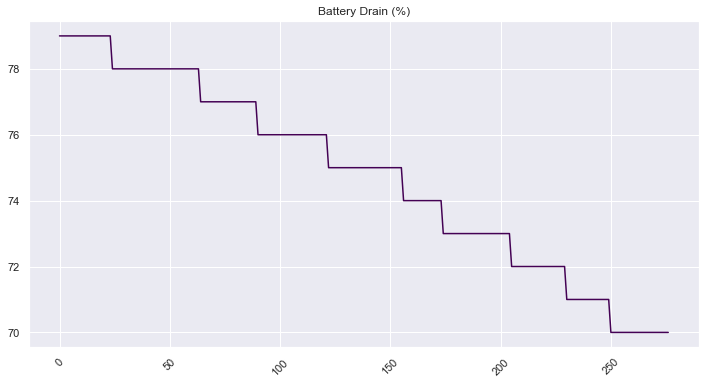

In [8]:
plot_df['Battery'].plot(figsize=(12,6), rot=45, cmap='viridis')
plt.title('Battery Drain (%)')
plt.show()

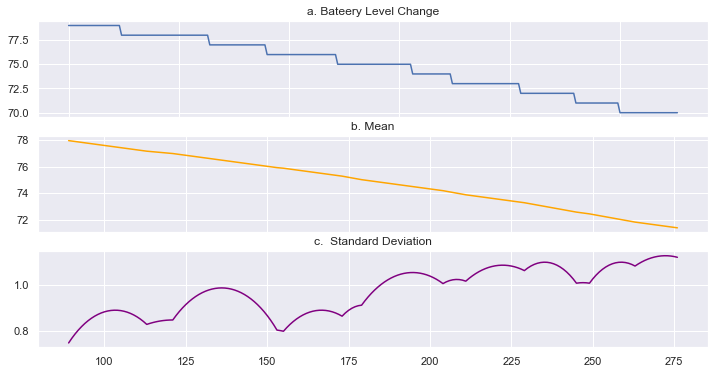

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1)
plot_df['Battery'].plot(ax=axes[0], figsize=(12,6), rot=10, title='a. Bateery Level Change', sharex=True)
plot_df['Battery'].rolling(90).mean().plot(ax=axes[1], figsize=(12,6), rot=90, title='b. Mean', color='orange')
plot_df['Battery'].rolling(90).std().plot(ax=axes[2], figsize=(12,6), rot=0, title='c.  Standard Deviation', color='purple')
plt.show()

In [10]:
sequence_length = 10
batch_size = 2
n_epochs = 50
n_epochs_stop = 10

#sequence_length = 10
#batch_size = 5
#n_epochs = 200
#n_epochs_stop = 50
label_name = 'Battery'

In [11]:
hist = train.train_model(train_df, test_df, label_name, sequence_length, batch_size, n_epochs, n_epochs_stop)

Starting with model training...
Epoch 1 train loss: 0.0648 test loss: 0.3738
Epoch 2 train loss: 0.0376 test loss: 0.3488
Epoch 3 train loss: 0.0192 test loss: 0.2494
Epoch 4 train loss: 0.0084 test loss: 0.2829
Epoch 5 train loss: 0.008 test loss: 0.3089
Epoch 6 train loss: 0.008 test loss: 0.333
Epoch 7 train loss: 0.0082 test loss: 0.3613
Epoch 8 train loss: 0.0076 test loss: 0.3795
Epoch 9 train loss: 0.0081 test loss: 0.3981
Epoch 10 train loss: 0.0081 test loss: 0.3814
Epoch 11 train loss: 0.0078 test loss: 0.3893
Epoch 12 train loss: 0.0091 test loss: 0.3915
Early stopping.
Completed.


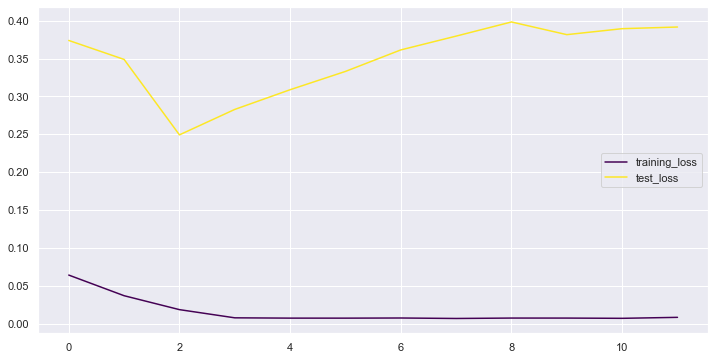

In [12]:
hist.plot(figsize=(12,6), cmap='viridis')
plt.show()

In [13]:
predictions_descaled, labels_descaled = inference.predict(df=test_df,
                                                          label_name='Battery',
                                                          sequence_length=sequence_length)

predictions_descaled.shape, predictions_descaled.shape

print(test_df.shape)

AttributeError: 'PosixPath' object has no attribute 'tell'

In [ ]:
print('Error on all test data:')
inference.print_loss_metrics(labels_descaled, predictions_descaled)
print('\n')
print('Error on partial test data:')
inference.print_loss_metrics(labels_descaled[:30], predictions_descaled[:30])

In [ ]:
# plot predictions vs true values
df_pred = pd.DataFrame()
df_pred['predicted'] = predictions_descaled
df_pred['true'] = labels_descaled
df_pred['residual'] = labels_descaled - predictions_descaled
df_pred.plot(figsize=(12,6), cmap='viridis')
#plt.xticks(rotation=45)
#plt.xlim(0,300)
plt.xlabel('Min')
plt.ylabel('Baterry Level')
plt.legend()
plt.show()

In [ ]:
from train import TimeSeriesDataset, TSModel
from torch.utils.data import DataLoader
import torch
import shap

In [ ]:
background_data_size = 232
test_sample_size = 40
sequence_length = 10

In [ ]:
shap_values = interpret.get_important_features(
    background_data_size,
    test_sample_size,
    sequence_length
)

In [ ]:
shap_plot = pd.DataFrame(shap_values, columns=train_df.columns.tolist())
shap_plot['Time'] = [i-11 for i in list(range(1,11))]
shap_plot.head()

In [ ]:
shap_plot.plot.area(x='Time',figsize=(10, 6), cmap='viridis')
plt.title("Deep SHAP - Feature Importance")
plt.show()